**Question 1**

In [42]:
using JuMP, Clp, ECOS, SCS

#set model
c = Model(Clp.Optimizer)
#create variables, constraints
@variable(c, 0 <= x1 <= 40)
@variable(c, 0 <= x2)
@constraint(c, x1 + x2 <= 80)
@constraint(c, 2*x1 + x2 <= 100)
#create objective
@objective(c, Max, 3*x1 + 2*x2)
#Solve
optimize!(c)
#display
println(c)
println()
println("Clp x1 = ", value(x1))
println("Clp x2 = ", value(x2))
println("Clp objective = ", objective_value(c))

Max 3 x1 + 2 x2
Subject to
 x1 + x2 ≤ 80
 2 x1 + x2 ≤ 100
 x1 ≥ 0
 x2 ≥ 0
 x1 ≤ 40


Clp x1 = 20.0
Clp x2 = 60.0
Clp objective = 180.0
Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp0006I 0  Obj 0 Dual inf 4.9999998 (2)
Clp0006I 2  Obj 180
Clp0000I Optimal - objective value 180
Clp0032I Optimal objective 180 - 2 iterations time 0.002


In [43]:
#set model
e = Model(ECOS.Optimizer)
#create variables, constraints
@variable(e, 0 <= x1 <= 40)
@variable(e, 0 <= x2)
@constraint(e, x1 + x2 <= 80)
@constraint(e, 2*x1 + x2 <= 100)
#create objective
@objective(e, Max, 3*x1 + 2*x2)
#Solve
optimize!(e)
#display
println(e)
println()
println("ECOS x1 = ", value(x1) )
println("ECOS x2 = ", value(x2) )
println("ECOS objective = ", objective_value(e))

Max 3 x1 + 2 x2
Subject to
 x1 + x2 ≤ 80
 2 x1 + x2 ≤ 100
 x1 ≥ 0
 x2 ≥ 0
 x1 ≤ 40


ECOS x1 = 19.999999995371343
ECOS x2 = 60.00000000167184
ECOS objective = 179.99999998945773

ECOS 2.0.8 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -1.461e+02  -4.631e+02  +2e+02  1e-04  4e-01  1e+00  3e+01    ---    ---    1  1  - |  -  - 
 1  -1.675e+02  -2.025e+02  +2e+01  1e-05  6e-02  4e-01  3e+00  0.8915  1e-02   0  0  0 |  0  0
 2  -1.793e+02  -1.884e+02  +5e+00  3e-06  2e-02  3e-01  8e-01  0.8382  9e-02   1  0  0 |  0  0
 3  -1.800e+02  -1.801e+02  +6e-02  3e-08  2e-04  4e-03  1e-02  0.9882  1e-04   1  0  0 |  0  0
 4  -1.800e+02  -1.800e+02  +6e-04  3e-10  2e-06  4e-05  1e-04  0.9890  1e-04   1  0  0 |  0  0
 5  -1.800e+02  -1.800e+02  +7e-06  4e-12  3e-08  5e-07  1e-06  0.9890  1e-04   1  0  0 |  0  0
 6  -1.800e+02  -1.800e+02  +8e-08  4e-14  3e-10  6e-09  1e-

In [44]:
#set model
s = Model(SCS.Optimizer)
#create variables, constraints
@variable(s, 0 <= x1 <= 40)
@variable(s, 0 <= x2)
@constraint(s, x1 + x2 <= 80)
@constraint(s, 2*x1 + x2 <= 100)
#create objective
@objective(s, Max, 3*x1 + 2*x2)
#Solve
optimize!(s)
#display
println(s)
println()
println("SCS x1 = ", value(x1))
println("SCS x2 = ", value(x2))
println("SCS objective = ", objective_value(s))

------------------------------------------------------------------
	       SCS v3.2.3 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 2, constraints m: 5
cones: 	  l: linear vars: 5
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 7, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 1.00e+02  3.00e+00  3.23e+02 -1.61e+02  1.00e-01  9.95e-05 
   100| 1.02e-04  9.58e-06  7.89e-04 -1.80e+02  1.00e-01  4.93e-04 
------------------------------------------------------------------
status:  solv

**Results:**
Based on the results above, it seems that the Clp solver model had the most accurate answer, as it was able to find the highest objective, although the other two models had essentially the same answer, with minor noise mixed in as a result of the mode by which the solver introduces in an attempt to get the most accurate answer. 

In [51]:
@time(optimize!(c))

  0.000359 seconds (2 allocations: 32 bytes)
Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp0000I Optimal - objective value 180
Clp0032I Optimal objective 180 - 0 iterations time 0.002


In [52]:
@time(optimize!(e))

  0.000510 seconds (304 allocations: 23.672 KiB)

ECOS 2.0.8 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -1.461e+02  -4.631e+02  +2e+02  1e-04  4e-01  1e+00  3e+01    ---    ---    1  1  - |  -  - 
 1  -1.675e+02  -2.025e+02  +2e+01  1e-05  6e-02  4e-01  3e+00  0.8915  1e-02   0  0  0 |  0  0
 2  -1.793e+02  -1.884e+02  +5e+00  3e-06  2e-02  3e-01  8e-01  0.8382  9e-02   1  0  0 |  0  0
 3  -1.800e+02  -1.801e+02  +6e-02  3e-08  2e-04  4e-03  1e-02  0.9882  1e-04   1  0  0 |  0  0
 4  -1.800e+02  -1.800e+02  +6e-04  3e-10  2e-06  4e-05  1e-04  0.9890  1e-04   1  0  0 |  0  0
 5  -1.800e+02  -1.800e+02  +7e-06  4e-12  3e-08  5e-07  1e-06  0.9890  1e-04   1  0  0 |  0  0
 6  -1.800e+02  -1.800e+02  +8e-08  4e-14  3e-10  6e-09  1e-08  0.9890  1e-04   1  0  0 |  0  0

OPTIMAL (within feastol=3.0e-10, reltol=4.2e-10, abstol=7.5e-08).
Runtime: 0.000125 seconds.

In [53]:
@time(optimize!(s))

------------------------------------------------------------------
	       SCS v3.2.3 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 2, constraints m: 5
cones: 	  l: linear vars: 5
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 7, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 1.00e+02  3.00e+00  3.23e+02 -1.61e+02  1.00e-01  1.28e-04 
   100| 1.02e-04  9.58e-06  7.89e-04 -1.80e+02  1.00e-01  5.93e-04 
------------------------------------------------------------------
status:  solv

**Results:** Although each solver decreases its runtime for each consecutive time the code is run, Clp and ECOS solvers seem to have a much faster runtime that SCS, which is explained by the fact that SCS solvers output a lot of information, which bogs down its computing time. As such, Clp seems to have the overall fastest runtime, followed closely by ECOS, and then SCS, with the difference being attributed to output volume. Especially for linear programming questions such as this one, SCS and ECOS are at a disadvantage simply because they are conic solvers, hence taking more time. 

**Question 2**

(a)
Math Model: 
\begin{align*}
\ max  \phantom{x_1 +} 100x_1 + 30x_2\\
   \mbox{s.t. } \phantom{4x_1 +} x_1 + x_2 &\leq 7\\
  10x_1 + 4x_2 &\leq 40\\
  x_2 &\geq 3\\
  x_1, x_2\geq 0\\
\end{align*}  


In [193]:
using JuMP, Clp

m = Model(Clp.Optimizer)
#create variables, constraints -> x1 = acres of hay, x2 = acres of corn
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)
@constraint(m, x1 + x2 <= 7)
@constraint(m, 10*x1 + 4*x2 <= 40)
@constraint(m, x2 >= 3)
#create objective
@objective(m, Max, 100*x1 + 30*x2)
#Solve
optimize!(m)
#display
println(m)
println()
println("Clp x1 = ", value(x1))
println("Clp x2 = ", value(x2))
println("Clp objective = ", objective_value(m))

Max 100 x1 + 30 x2
Subject to
 x2 ≥ 3
 x1 + x2 ≤ 7
 10 x1 + 4 x2 ≤ 40
 x1 ≥ 0
 x2 ≥ 0


Clp x1 = 2.8
Clp x2 = 3.0
Clp objective = 370.0
Coin0506I Presolve 2 (-1) rows, 2 (0) columns and 4 (-1) elements
Clp0006I 0  Obj 90 Dual inf 130 (2)
Clp0006I 3  Obj 370
Clp0000I Optimal - objective value 370
Coin0511I After Postsolve, objective 370, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 370 - 3 iterations time 0.002, Presolve 0.00


(b) Code the same model once again, this time separating the parameters from the solution as we did in class (see Top Brass examples). Confirm that you obtain the same solution as in part (a).

In [2]:
bushels = [:hay, :corn] 

acreage = Dict(:hay => 1, :corn => 1)

labor_req = Dict(:hay => 10, :corn => 4) 

govt_req = Dict(:corn => 3)

yield = Dict(:hay => 25, :corn => 10)

profit = Dict( :hay => 4, :corn => 3) 

time = 40
acre_lim = 7;     

Dict{Symbol, Int64} with 2 entries:
  :hay  => 1
  :corn => 1

In [195]:
using JuMP, Clp
m = Model(Clp.Optimizer)

@variable(m, bushel[bushels] >= 0)
@objective(m, Max, sum(profit[i] * yield[i] *bushel[i] for i in bushels))  
@constraint(m, sum(labor_req[i] * bushel[i] for i in bushels) <= time)
@constraint(m, sum(acreage[i] * bushel[i] for i in bushels) <= acre_lim)
@constraint(m, bushel[:corn] >= 3)

optimize!(m)

println(value.(bushel))


1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, [:hay, :corn]
And data, a 2-element Vector{Float64}:
 2.8
 3.0
Coin0506I Presolve 2 (-1) rows, 2 (0) columns and 4 (-1) elements
Clp0006I 0  Obj 90 Dual inf 130 (2)
Clp0006I 3  Obj 370
Clp0000I Optimal - objective value 370
Coin0511I After Postsolve, objective 370, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 370 - 3 iterations time 0.002, Presolve 0.00


(c) Solve the problem graphically by plotting the feasible set and at least two isocost lines for the objective function. Confirm that you obtain the same solution as in the previous parts.

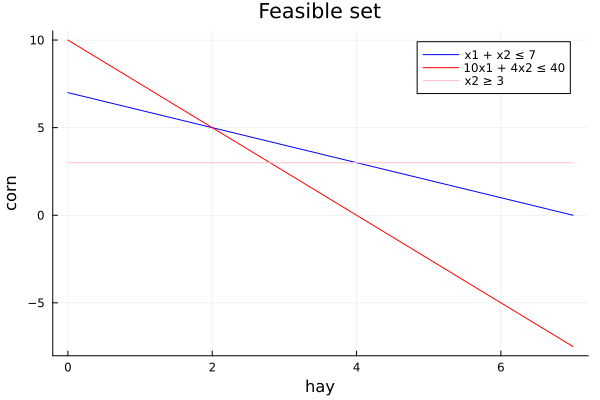

In [197]:
using Plots

x_range = 0:0.1:7
y_range = 0:0.1:10

# constraints
acres = 7 .- x_range
hours = (40 .- 10 .* x_range) ./ 4
min_corn = ones(length(x_range)) .* 3

plot(x_range, y_range, xlims=(0, 7), ylims=(0, 10), xlabel="x1", ylabel="x2")
plot(x_range, acres, line=:solid, color=:blue, label="x1 + x2 ≤ 7")
plot!(x_range, hours, line=:solid, color=:red, label="10x1 + 4x2 ≤ 40")
plot!(x_range, min_corn, line=:solid, color=:pink, label="x2 ≥ 3")


title!("Feasible set")
xlabel!("hay")
ylabel!("corn")

plot!()


**Question 3**


A mining company ("OptiMine") is planning mine operations for the next week. There are 10 different mine locations available for ore extraction. OptiMine needs to mine 3,000 tons of ore to meet demand. Each mine location has a total number of tons of ore available. Mining at each location has an associated cost per ton. Finally, ore extracted from each mine contains a different percentage of different elements (e.g., carbon, gold). The cost, ore available, and percentage of elements in the ore at each mining location are given in the .csv file "mine.csv." A sample of the data is given in the table below. There is a minimum percentage of each element required across the total ore extracted, also given in the .csv file.

 
(a) Formulate a linear program to help OptiMine plan mining operations to meet requriments at a minimal cost. Give a general form (parameters only -- no numbers) of the math model.



In [266]:
#You might need to run "Pkg.add(...)" before using these packages
using DataFrames, CSV, NamedArrays

#Load the data file
df = CSV.read("mine.csv",DataFrame,delim=',');

# create a list of mines
mines = convert(Array,df[2:end,1])

# create a list of elements
elements = 1:5

# create a dictionary of the total cost of mining at each location
cost_to_mine = Dict(zip(mines,df[2:end,7]))

# create a dictionary of the max tons available at each location
max_avail = Dict(zip(mines,df[2:end,8]))

# create a dictionary of the min % of each element
min_req = Dict(zip(elements,df[1,2:6]))

# create a matrix of the % of each element at each loation
mine_element_matrix = Matrix(df[2:end,2:6])

# rows are mines, columns are elements
mine_element_array = NamedArray(mine_element_matrix, (mines, elements),("mines","elements"))
;

(a)


Let c[i] be the cost per ton at mine i for i in mines <br>
Let max[i] be the max tons available at mine i for i in mines <br>
Let min_req[i] be the required percentage of element k for k in elements <br>
Let mine_element_array[i,k] be the percent element k in ore extracted from mine i for i in mines and k in elements <br>
Let x[i] be the number of tons of ore extracted from mine i for i in mines <br>
let td = tons demanded (3000) <br> 


Min sum((c[i]) * (x[i])) <br>

s.t.  sum(x[i]) >= 3000 <br>
      sum((mine_element_array[i,k]) * (x[i]) >= (min_req[k]) * sum(x[i])) <br>
      x[i] >= 0

In [287]:
#(b)

using JuMP, Clp

m = Model(Clp.Optimizer)

@variable(m, x[mines] >= 0)

@constraint(m, sum(x[i] for i in mines) == 3000)
for k in elements
    @constraint(m, sum(mine_element_array[i, k] * x[i] for i in mines) >= min_req[k] * sum(x[i] for i in mines))
end

@objective(m, Min, sum(cost_to_mine[i] * x[i] for i in mines))

optimize!(m)

println(m)
println()
for i in mines
    println("x= ", value(x[i]))
end

println("objective = ", objective_value(m))

Min 20 x[1] + 20 x[2] + 29 x[3] + 21 x[4] + 27 x[5] + 23 x[6] + 19 x[7] + 16 x[8] + 17 x[9] + 27 x[10]
Subject to
 x[1] + x[2] + x[3] + x[4] + x[5] + x[6] + x[7] + x[8] + x[9] + x[10] = 3000
 -x[1] + 6 x[2] - 3 x[3] + 4 x[4] + 5 x[6] + x[7] + 2 x[8] + 6 x[9] - 3 x[10] ≥ 0
 -4 x[1] - x[2] - x[3] + 3 x[4] - x[5] - 4 x[6] - 2 x[7] + 3 x[8] + 3 x[9] - 4 x[10] ≥ 0
 -5 x[1] + 2 x[2] - 2 x[4] - 3 x[5] - 5 x[6] - 5 x[7] + 3 x[8] + x[9] - 2 x[10] ≥ 0
 3 x[1] + 3 x[2] - 2 x[3] + 2 x[4] + 4 x[7] + 2 x[8] - 2 x[9] + 3 x[10] ≥ 0
 x[1] + x[2] - x[3] + x[4] - 2 x[5] - 4 x[6] - 2 x[7] - 2 x[8] - 4 x[9] + x[10] ≥ 0
 x[1] ≥ 0
 x[2] ≥ 0
 x[3] ≥ 0
 x[4] ≥ 0
 x[5] ≥ 0
 x[6] ≥ 0
 x[7] ≥ 0
 x[8] ≥ 0
 x[9] ≥ 0
 x[10] ≥ 0


x= 333.3333333333336
x= 1666.6666666666665
x= 0.0
x= 0.0
x= 0.0
x= 0.0
x= 0.0
x= 999.9999999999999
x= 0.0
x= 0.0
objective = 56000.0
Coin0506I Presolve 6 (0) rows, 10 (0) columns and 56 (0) elements
Clp0006I 0  Obj 0 Primal inf 3000 (1)
Clp0006I 4  Obj 56000
Clp0000I Optimal - objective val

**Question 4** 


Consider the following LP:

\begin{align*}
\min 2x_1 - x_2 +3x_3 - 2x_4\\
   \mbox{s.t. } \phantom{4x_1 +} 3x_2- x_3 + 4x_4 &\geq 10\\
  4x_1 - 7x_2 +x_3- x_4 &= 5\\
  x_1 \phantom{+ 2x_2} -3x_3 + 8x_4 &\leq 3\\
  x_1, x_4\geq 0\\
  x_2, x_3 & \mbox{ Unrestricted in Sign (Free)}\\
\end{align*}  

(a) Convert the problem to standard form.

\begin{align*}
\ -max -2x_1 + (u - v) - 3(p - q) + 2x_4\\
   \mbox{s.t. } \phantom{4x_1 +} -3(u - v) + (p - q) - 4x_4 &\leq -10\\
  4x_1 - 7(u - v) + (p - q) - x_4 &\leq 5\\
  -4x_1 + 7(u - v) - (p - q) + x_4 &\leq -5\\
  x_1 \phantom{+ 2x_2} -3(u - v) + 8x_4 &\leq 3\\
  x_1, x_4, u, v, p, q\geq 0\\
\end{align*}  


(b)    



x = 
$\begin{pmatrix}
x_1\\
x_4\\
u - v\\
p - q\\
\end{pmatrix}$,  A = 
$\begin{pmatrix}
0 & -3 & 1 & -4\\
4 & -7 & 1 & -1\\
-4 & 7 & -1 & 1\\
1 & -3 & 0 & 8\\
\end{pmatrix}$, b = $\begin{pmatrix}
-10\\
5\\
-5\\
3\\
\end{pmatrix}$, c = 
$\begin{pmatrix}
-2\\
1\\
-3\\
2\\
\end{pmatrix}$ 



both x_2 and x_3 are free, and is represented by (u - v) and (p - q) respectively.








(c)

In [265]:
using JuMP, Clp

m = Model(Clp.Optimizer)


@variable(m, u >= 0)
@variable(m, v >= 0)
@variable(m, p >= 0)
@variable(m, q >= 0)
@variable(m, x1 >= 0)
@variable(m, x4 >= 0)

@constraint(m, -3*(u - v) + (p - q) - 4*x4 <= -10)
@constraint(m, 4*x1 - 7*(u - v) + (p - q) - x4 <= 5)
@constraint(m, -4*x1 + 7*(u - v) - (p - q) + x4 <= -5)
@constraint(m, x1 - 3*(p - q) + 8*x4 <= 3)

@objective(m, Max, -2x1 + (u - v) - 3*(p - q) + 2*x4)

optimize!(m)

println(m)
println()
println("x1 = ", value(x1))
println("x2 = ", value(u-v))
println("x3 = ", value(p-q))
println("x4 = ", value(x4))
println("objective = ", -objective_value(m))

Max -2 x1 + u - v - 3 p + 3 q + 2 x4
Subject to
 -3 u + 3 v + p - q - 4 x4 ≤ -10
 -7 u + 7 v + p - q + 4 x1 - x4 ≤ 5
 7 u - 7 v - p + q - 4 x1 + x4 ≤ -5
 -3 p + 3 q + x1 + 8 x4 ≤ 3
 u ≥ 0
 v ≥ 0
 p ≥ 0
 q ≥ 0
 x1 ≥ 0
 x4 ≥ 0


x1 = 7.593750908970833
x2 = 3.8437506705522537
x3 = 1.53125
x4 = 0.0
objective = 15.937501817941666
Coin0506I Presolve 4 (0) rows, 6 (0) columns and 21 (0) elements
Clp0006I 0  Obj 0 Primal inf 3.2142855 (2) Dual inf 11 (3)
Clp0006I 3  Obj -15.937502
Clp0000I Optimal - objective value -15.937502
Clp0032I Optimal objective -15.93750182 - 3 iterations time 0.002
